# **1. Probability**


In [15]:
import random

data = [random.randint(0,9) for _ in range(50)] # array comprehensions
print(data)

[9, 1, 8, 7, 6, 7, 1, 7, 7, 7, 2, 5, 5, 9, 4, 2, 9, 4, 7, 3, 7, 4, 3, 2, 2, 2, 3, 2, 2, 2, 0, 4, 5, 7, 9, 0, 3, 2, 2, 2, 8, 2, 3, 1, 2, 4, 0, 3, 1, 6]


In [16]:
prob_9 = data.count(9)/20 # probality occurs 9 of data.
print(prob_9)

0.2


Visulization data on histogram

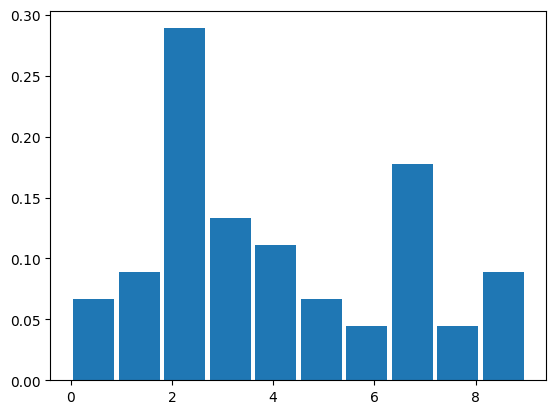

In [17]:
import matplotlib.pyplot as plt

plt.hist(data, bins = 10, rwidth = 0.9, density = True)
plt.show()

# **2. Gaussian Distribution**


## 2.1 Using array

Compute mean

In [37]:
import numpy as np

heights = [random.random()*200 for _ in range(1000)] # array comprehession
mean = sum(heights) / len(heights)
print(mean) # compute average of arrays heights.

100.49444781575113


Compute Varian

In [38]:
distances = [(value - mean)**2 for value in heights]
var = sum(distances) / len(distances)
print(var)

3390.6834118489273


In [39]:
import math

def gaussian_func(x, mean, var):
  return (1.0/np.sqrt(2*math.pi*var)) * np.exp(-(x-mean)**2 / (2*var))

f_x = [gaussian_func(x, mean, var) for x in heights]
print(f_x)

[0.006781148723624281, 0.005017482452150739, 0.005475129395884077, 0.004678507902213986, 0.005259657335689346, 0.004240841733857201, 0.0028997165347287974, 0.0022985272373403595, 0.003071741291440895, 0.006559069745942777, 0.0060197160263234534, 0.005123346907463105, 0.005867269890324167, 0.006429003775898105, 0.004983866551796987, 0.004271537236647421, 0.0064752561155215155, 0.0019420124870208194, 0.004582706318526204, 0.0015904954881386464, 0.0037093443055432472, 0.004959991506137524, 0.002572942597625078, 0.006703301680529564, 0.004570408635309758, 0.006106296870558218, 0.004024705935484592, 0.0035155474387227608, 0.0022051010328625513, 0.0016614558089296588, 0.0024654195661539336, 0.005198729405052578, 0.003943022952198566, 0.0053485464574097715, 0.005044422438914821, 0.006491588442486062, 0.006850859537648078, 0.0029474639321136298, 0.006837375120569381, 0.00564652872657222, 0.0034455270334835786, 0.006501030893100788, 0.0038830859884437623, 0.0022509246242030977, 0.00611041416821

## 2.2 Using numpy

In [59]:
import numpy as np

heights = [random.random()*20 for _ in range(15)]
heights = np.array(heights)
print(heights)

[ 2.334497    8.54757412  6.72509713  2.72583571 14.2210706   8.46584508
 13.95030357 17.98126714 14.10128514 17.36808652 13.35406622  3.1204342
  3.1024416   5.86011815 17.33554871]


In [60]:
mean = np.mean(heights)
var = np.mean(heights)
std = np.sqrt(var)

print(mean)
print(var)
print(std)

9.94623139215793
9.94623139215793
3.153764638041008


In [62]:
import math

def gaussian_func_np(data, mean, var):
  return (1.0/np.sqrt(2*math.pi*var))*np.exp(-(data-mean)**2/ (2*var))
output = gaussian_func_np(heights, mean, var)
print(output)

[0.00687323 0.11464943 0.0750857  0.00920202 0.05047953 0.11330127
 0.0565009  0.00492675 0.05310812 0.00793382 0.07055651 0.01215877
 0.01200937 0.05464681 0.00812837]


# **3. Central Linmit Theorem**

## Example 1

In [64]:
import random
import math

num_of_samples = 30000
sample_size = 50

means = []
for _ in range(num_of_samples):
  data = [random.randint(0, 499) for _ in range(sample_size)]

  mean = sum(data)/sample_size

  means.append(mean)

Plot histogram

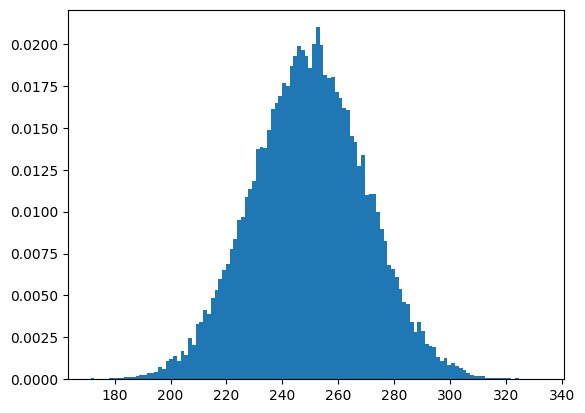

In [68]:
import matplotlib.pyplot as plt

plt.hist(means, bins = 120, density = True)
plt.show()

<Axes: ylabel='Count'>

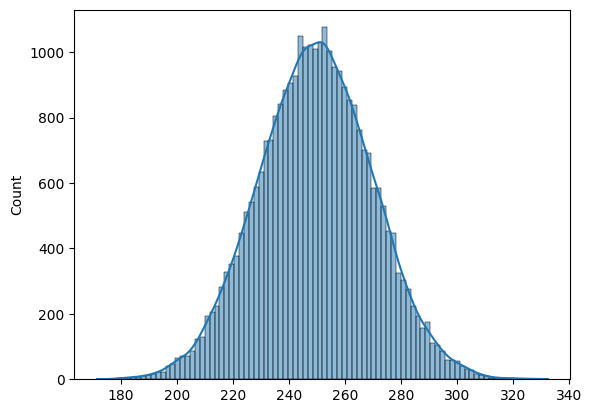

In [69]:
import seaborn as sns
sns.histplot(means, kde = True)

# Example 2


In [84]:
import random
import math

num_of_samples = 30000
sample_size = 30
side = 500

means = []

for _ in range(num_of_samples):

  mean = 0
  for _ in range(sample_size):
    # generate a random point
    x = random.randint(0, side - 1) # remove
    y = random.randint(0, side - 1) # remove

    # distance to (0,0)
    distance = math.sqrt(x**2 + y**2)

    #get pixel value and add to mean
    mean = mean + distance
  #normalize to get mean
  mean = mean / sample_size

  #add to list
  means.append(mean)

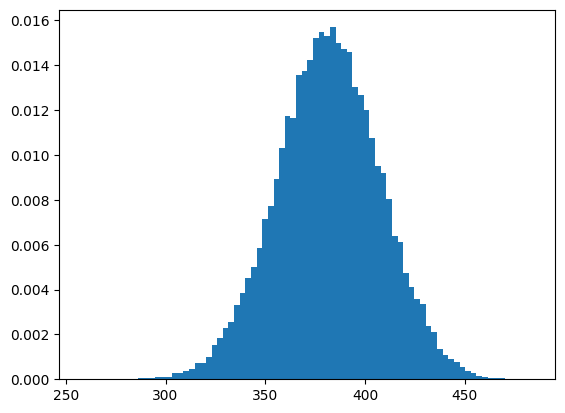

In [85]:
import matplotlib.pyplot as plt
plt.hist(means, bins=80, density = True)
plt.show()

<Axes: ylabel='Count'>

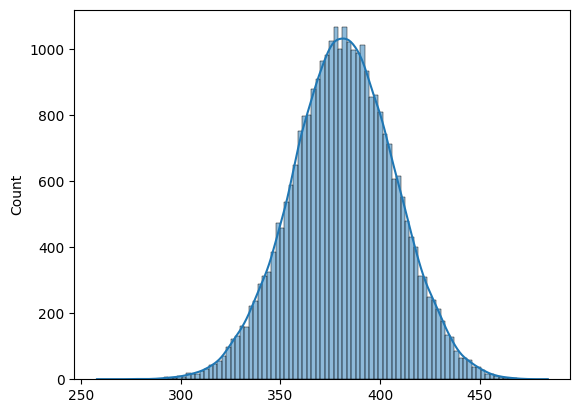

In [86]:
import seaborn as sns
sns.histplot(means, kde = True)

# 4. Random Search

In [105]:
import random

#encoding
def generate_random_value(bound = 100):
  return (random.random()*2 - 1)*bound

def compute_cost(individual): # cost
  return sum(val*val for val in individual)

def create_individual():
  return [generate_random_value() for _ in range(n)]

def mutate(individual, mutation_rate = 0.1):
  individual_m = individual.copy()

  pos = random.randint(0, n-1)
  if random.random() < mutation_rate:
    individual_m[pos] = generate_random_value();

    if compute_cost(individual_m) <  compute_cost(individual):
      return individual_m
    else:
      return individual

In [111]:
n = 2
m = 6
n_generations = 30000

losses = []

#algorithm
#Create initial population

population = [create_individual() for _ in range(m)]

elitism = 2
for i in range(n_generations):
  sorted_population = sorted(population, key=compute_cost)

  #for debug
  if (i % 10 == 0):
    print("cost: ", compute_cost(sorted_population[0]))

  new_population = []
  index = 0
  while len(new_population) < m:
    individual = population[index]
    individual_m = mutate(individual)
    new_population.append(individual_m)
    index += 1

  population = new_population

cost:  3848.0931078406993
cost:  787.6370075644264
cost:  557.4089122023338
cost:  277.3570482511964
cost:  194.53252049298627
cost:  144.8311015225989
cost:  144.8311015225989
cost:  144.8311015225989
cost:  37.94107909030311
cost:  37.94107909030311
cost:  37.94107909030311
cost:  37.94107909030311
cost:  37.94107909030311
cost:  37.94107909030311
cost:  37.94107909030311
cost:  23.371432386648262
cost:  23.371432386648262
cost:  23.371432386648262
cost:  23.371432386648262
cost:  23.371432386648262
cost:  23.371432386648262
cost:  23.371432386648262
cost:  23.371432386648262
cost:  23.344884482065947
cost:  23.344884482065947
cost:  23.344884482065947
cost:  23.344884482065947
cost:  17.24364327617242
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.42854645087279
cost:  16.4